# I. **Downloading Dataset**

- Data source - Kaggle

In [2]:
datafile_name = '\Car_Price_Predictor\quikr_car - quikr_car.csv'

### Reading dataset

In [3]:
import pandas as pd
df = pd.read_csv(datafile_name)
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


Here we have 892 rows and 6 columns

# II. **Data preparation and Cleaning**

### Looking at some information about the data and data columns

In [4]:
df.shape

(892, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


### Looking for missing values

In [7]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [8]:
df.nunique()

name          525
company        48
year           61
Price         274
kms_driven    258
fuel_type       3
dtype: int64

In [9]:
df.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [10]:
df.Price.unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [11]:
df.fuel_type.unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

### Looking for Duplicate Values

In [12]:
df[df.duplicated(subset = None, keep = False)]

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
7,Hyundai Eon,Hyundai,2013,"1,90,000","25,000 kms",Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,"8,30,000","24,530 kms",Diesel
...,...,...,...,...,...,...
641,Maruti Suzuki Swift VDi BS IV,Maruti,2012,"2,80,000","48,006 kms",Diesel
726,Maruti Suzuki Swift Dzire Tour VDi,Maruti,2009,"2,50,000","51,000 kms",Diesel
727,Mahindra Scorpio S4,Mahindra,2015,"8,65,000","30,000 kms",Diesel
861,Hyundai Getz Prime 1.3 GLX,Hyundai,2009,"1,15,000","20,000 kms",Petrol


### Errors in data


 - Years has many non - year values
 - Years object to int
 - Remove ask for price in Price column
 - Price object to int
 - remove kms in kms_driven column
 - kms_driven object to int
 - kms has 52 Missing values
 - fuel_type has 54 missing values
 - Keep first 3 words of name

## **Cleaning our data**

### Year

In [13]:
df = df[df.year.str.isnumeric()]

In [14]:
df.year = df.year.astype(int)

In [15]:
df.year

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int32

#### *Price*

In [16]:
df = df[df.Price!='Ask For Price']

In [17]:
df['Price']  = df['Price'].str.replace(',','').astype(int)

In [18]:
df.Price

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: int32

### kms_driven

In [19]:
df.kms_driven = df.kms_driven.str.split(" ").str.get(0).str.replace(",","")

In [20]:
df = df[df.kms_driven.str.isnumeric()]

In [21]:
df.kms_driven = df.kms_driven.astype(int)

In [22]:
df.kms_driven

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 817, dtype: int32

### fuel_type

In [23]:
df = df[~df.fuel_type.isna()]

In [24]:
df.fuel_type

0      Petrol
1      Diesel
3      Petrol
4      Diesel
6      Diesel
        ...  
883    Petrol
885    Diesel
886    Petrol
888    Diesel
889    Diesel
Name: fuel_type, Length: 816, dtype: object

### Name

In [25]:
df.name = df.name.str.split(" ").str.slice(0,3).str.join(' ')

In [26]:
df.name

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

## **LOOKING AT OUR DATA**

In [27]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


## Fixing outliers

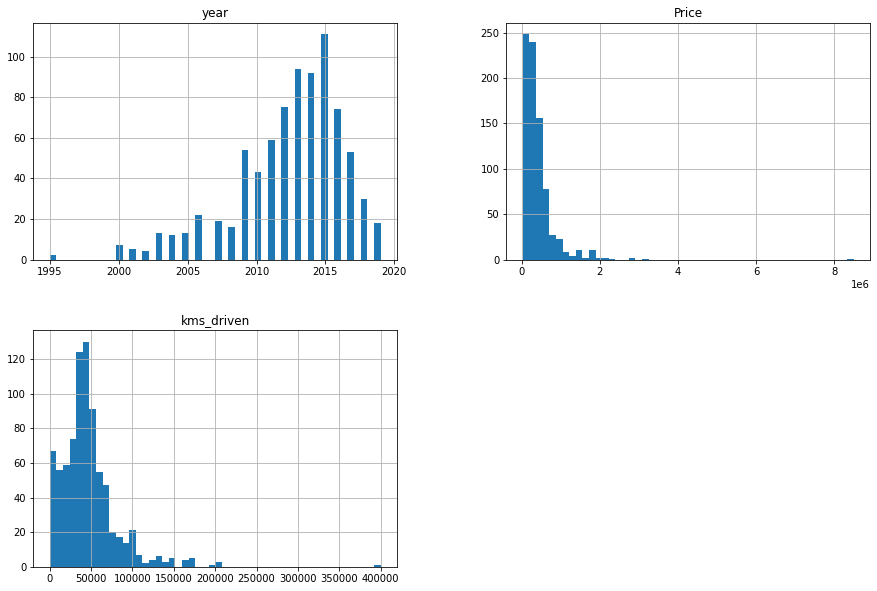

In [29]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15,10))
plt.show()

In [30]:
df = df[df.Price<6e6]

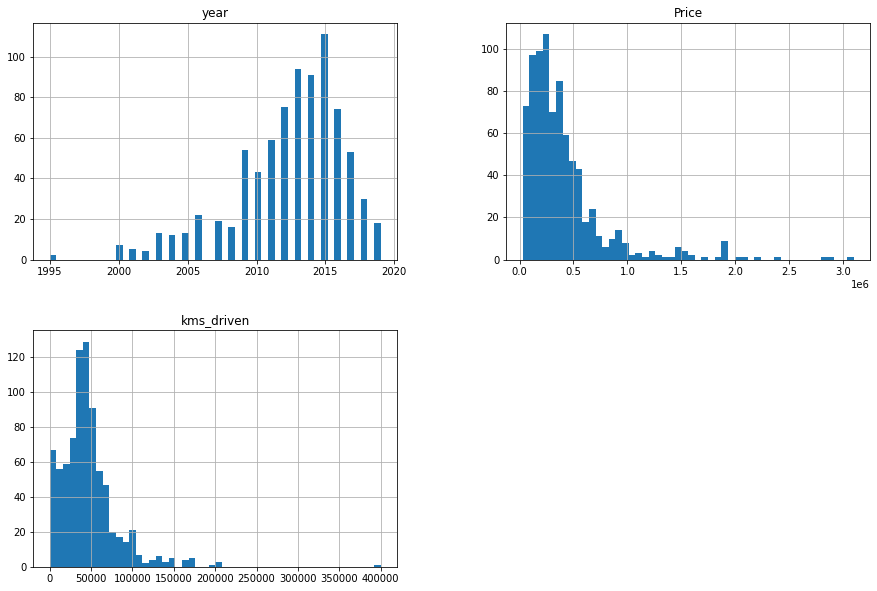

In [31]:
df.hist(bins=50, figsize=(15,10))
plt.show()

In [32]:
df = df[df.kms_driven<400000]

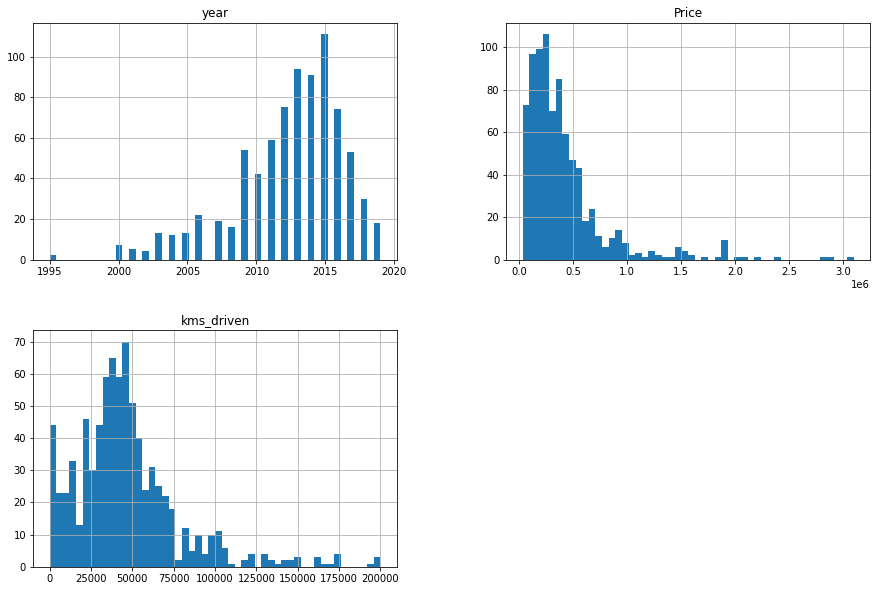

In [33]:
df.hist(bins=50, figsize=(15,10))
plt.show()

In [34]:
df.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
809,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
810,Tata Indica V2,Tata,2009,110000,30000,Diesel
811,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
812,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [35]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [36]:
df.describe()

,year,Price,kms_driven
count,814.000000,8.140000e+02,814.000000
mean,2012.445946,4.019921e+05,45842.547912
std,4.006625,3.817812e+05,32017.452360
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56681.000000
max,2019.000000,3.100000e+06,200000.000000


## Correlation Heatmap

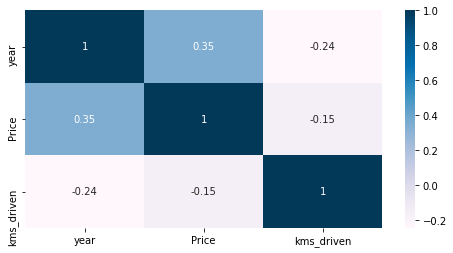

In [37]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), cmap = 'PuBu', annot = True)
plt.show()

Absence of multicollinearity in our data since the correlation coefficient is very low.

## **Saving our clean data**

In [38]:
df.to_csv('Clean_car.csv')

# III. **VISUALIZATION**

### Year vs Price

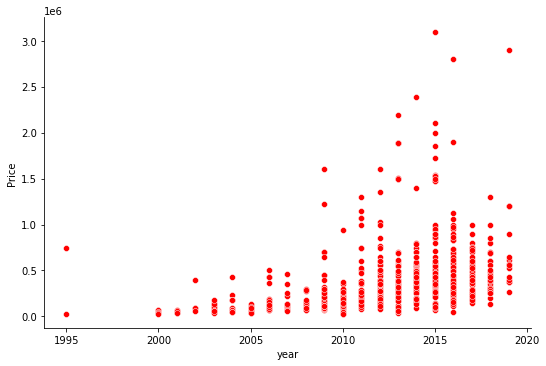

In [39]:
sns.relplot(x='year',y='Price',data=df,height=5,aspect=1.5, color = 'red')

### Distance vs Price

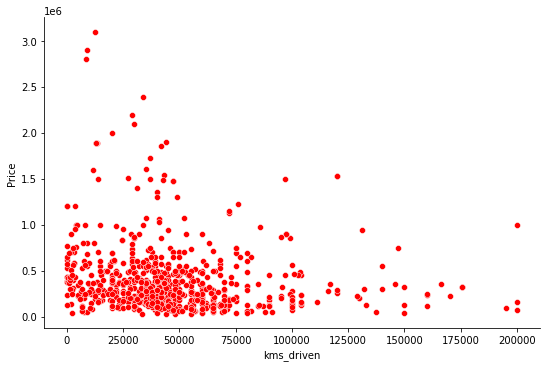

In [40]:
sns.relplot(x='kms_driven',y='Price',data=df,height=5,aspect=1.5, color = 'red')

### Fuel Type vs Price

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

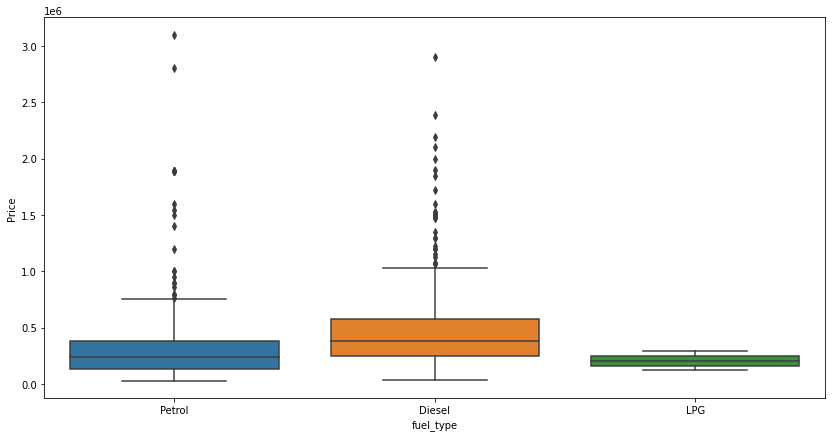

In [41]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=df)

### Company vs Price

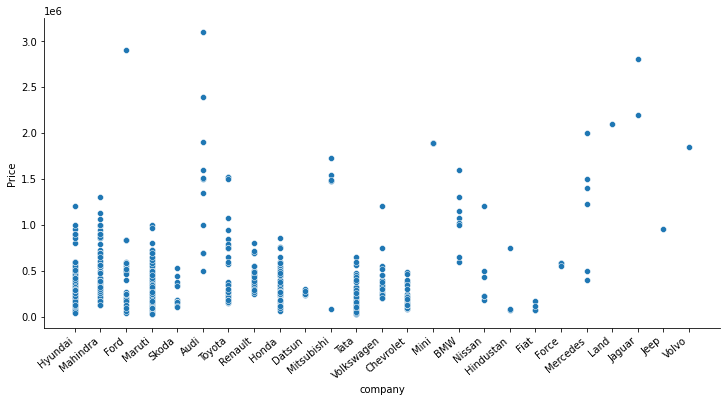

In [42]:

ax=sns.relplot(x='company',y='Price',data=df,height=5,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

# III. **MODEL**

### Creating Dependent and Independent Variable

#### Independent Variable


In [43]:
x = df.drop(columns='Price')

#### Dependent Varaible

In [44]:
y = df.Price


#### Training dataset

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size  = 0.2)

### Importing useful libraries for linear regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [47]:
ohe = OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [48]:
column_transformer = make_column_transformer((OneHotEncoder(ohe.categories_),['name','company','fuel_type']),
                                                                   remainder = 'passthrough')

C:\Users\wazid\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport

In [49]:
lr = LinearRegression()

In [50]:
pipe = make_pipeline(column_transformer,lr)

In [51]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [52]:
x_train

,name,company,year,kms_driven,fuel_type
108,Maruti Suzuki Ertiga,Maruti,2013,42000,Diesel
267,Maruti Suzuki SX4,Maruti,2010,36000,Petrol
375,Maruti Suzuki Zen,Maruti,2003,69900,Petrol
307,Chevrolet Tavera Neo,Chevrolet,2013,55000,Diesel
456,Mahindra TUV300 T4,Mahindra,2016,35000,Diesel
...,...,...,...,...,...
283,Tata Indigo eCS,Tata,2016,175430,Diesel
477,Maruti Suzuki Baleno,Maruti,2016,22000,Petrol
581,Maruti Suzuki Ertiga,Maruti,2013,52500,Diesel
139,Hindustan Motors Ambassador,Hindustan,2000,200000,Diesel


In [53]:
y_pred = pipe.predict(x_test)

In [54]:
r2_score(y_test,y_pred)

0.6578688926555678

In [55]:
scores = []
for i in range(1000):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = i)
  pipe.fit(x_train,y_train)
  y_pred = pipe.predict(x_test)
  scores.append(r2_score(y_test,y_pred))


In [56]:
import numpy as np
np.argmax(scores)

124

In [57]:
scores[np.argmax(scores)]

0.9038617612562133

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = np.argmax(scores))
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test,y_pred)

0.9038617612562133

In [59]:
import pickle

In [60]:
pickle.dump(pipe,open('LinearRegression.pkl','wb'))